## The Sparks Foundations
### PREDICTIONS USING SUPERISED ML
### Prediction of percentage of students based on number of study hours

In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [49]:
import matplotlib.pyplot as plt

In [5]:
link= "http://bit.ly/w-data"

In [6]:
df = pd.read_csv(link)

In [7]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


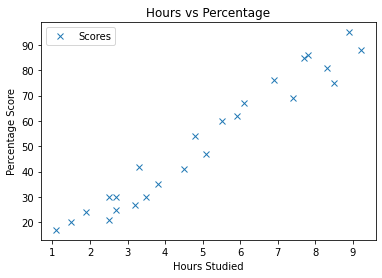

In [51]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='x')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Now lets have x (feture) and y (label) as separate

In [8]:
x = df.iloc[:,0].values

In [9]:
x

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [10]:
x.shape

(25,)

In [12]:
x = x.reshape(25,1)

In [13]:
x.shape

(25, 1)

## NOTE : Same is done by x = df.iloc[:,0].values.reshape(-1,1) as we may dont know how many vlues are there so thats why -1

In [14]:
y = df.iloc[:,1].values

In [15]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [16]:
y.shape

(25,)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
Lin = LinearRegression()

In [19]:
Lin

LinearRegression()

## Now Fit

In [20]:
Lin.fit (x,y)

LinearRegression()

In [21]:
Lin.predict([[9.25]])

array([92.90985477])

### Lets split data into train and test data

In [22]:
from sklearn.model_selection import train_test_split

-- Lets take 80% train data, 20% test data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)       

In [24]:
x_train.shape

(20, 1)

In [25]:
x_test.shape

(5, 1)

In [26]:
y_train.shape

(20,)

In [27]:
y_test.shape

(5,)

## Now fit the model using Training Data (x_train, y_train)

In [28]:
Lin.fit(x_train, y_train)

LinearRegression()

## Find predicted values of test data (x_test)

In [29]:
y_pred = Lin.predict(x_test)

In [30]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [31]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [32]:
abs(y_pred - y_test)

array([3.11585524, 6.73226078, 6.357018  , 3.20519876, 1.50896672])

In [33]:
abs(y_pred - y_test).mean()

4.183859899002975

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
mean_squared_error(y_test,y_pred)

21.5987693072174

In [36]:
mean_absolute_error(y_test,y_pred)

4.183859899002975

In [37]:
r2_score(y_test,y_pred)

0.9454906892105356

In [38]:
type(y_test)

numpy.ndarray

In [39]:
import numpy as np

In [52]:
df_temp = pd.DataFrame(data=np.column_stack((x_test,y_test)),columns=['HOURS','ACTUAL %'])

In [53]:
df_temp

,HOURS,ACTUAL %
0,1.5,20.0
1,3.2,27.0
2,7.4,69.0
3,2.5,30.0
4,5.9,62.0


In [43]:
df_temp ["PREDICTED BY REGRESSION"] = y_pred

In [44]:
df_temp

,HOURS,ACTUAL,PREDICTED BY REGRESSION
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [54]:
Lin.predict([[9.25]])

array([93.69173249])